In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

import time
from datetime import datetime, timedelta

import requests
from bs4 import BeautifulSoup

In [2]:
def generate_dates(start,end):
    start_date = datetime(start, 1, 1)
    end_date = datetime(end, 1, 31)

    date_list = []
    current_date = start_date
    while current_date <= end_date:
        date_list.append(current_date.strftime('%Y/%m/%d'))
        current_date += timedelta(days=1)
    
    return date_list

def generate_wsj_url(date, page):
    base_url = "https://www.wsj.com/news/archive/"
    url = f"{base_url}{date}?page={page}"
    return url

In [3]:
date_list = generate_dates(2014,2014)
results = pd.DataFrame(columns=["date","category","headline"])
headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0'}

start_time = time.time()
for date in date_list:
    num_articles = -1; page = 0
    while num_articles != 0:
        page = page + 1
        url = generate_wsj_url(date, page)
        soup = BeautifulSoup(requests.get(url, headers=headers).content, 'html.parser')
        num_articles = len(soup.select('article'))
        for article in soup.select('article'):
            category = article.span.text
            headline = article.h2.text
            results.loc[len(results),:] = [date, category, headline]
end_time = time.time()
execution_time = end_time - start_time
print(f"コードの実行時間: {execution_time} 秒")

コードの実行時間: 257.54032135009766 秒


In [4]:
def plot_bar(input_list, n):
    element_counts = Counter(input_list); total_elements = len(input_list)
    element_rates = {element: count / total_elements for element, count in element_counts.items()}
    top_elements = sorted(element_rates.items(), key=lambda x: x[1], reverse=True)[:n]
    elements, rates = zip(*top_elements)
    elements = elements[::-1]; rates = rates[::-1]
    plt.figure(figsize=(8, 8))
    plt.barh(elements, rates)
    plt.xlabel('Rate of Occurrence'); plt.ylabel('Elements'); plt.title(f'Top {n} Elements by Rate of Occurrence (Jan, 2014)')
    plt.show()

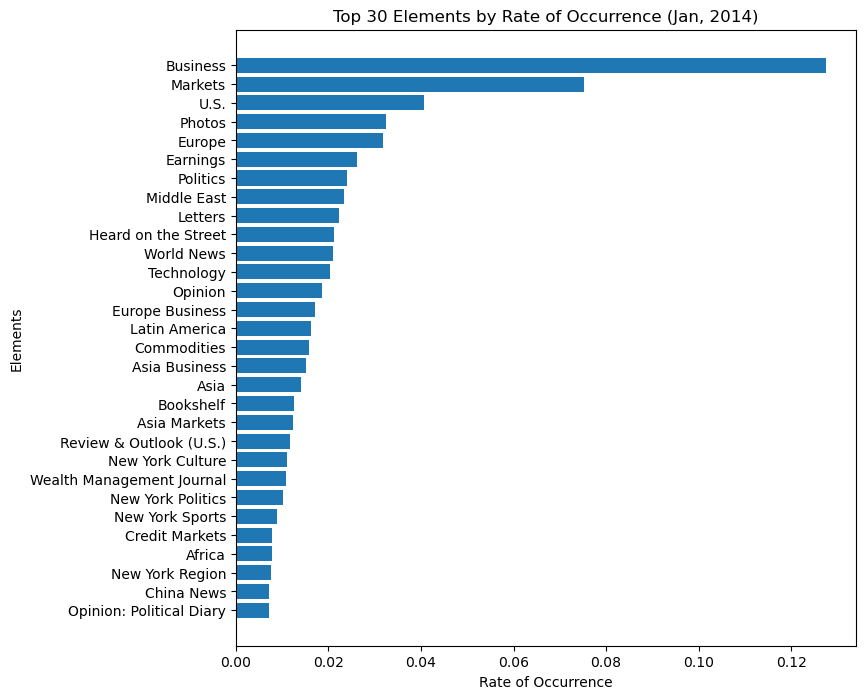

In [5]:
plot_bar(results["category"],30)